In [74]:
import pandas as pd
import numpy as np
import requests
import lxml.html as lh
import matplotlib.pyplot as plt
import re
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup as soup

%matplotlib inline  
plt.rcParams['figure.figsize'] = 8,4

In [75]:
def cleanString(a):
    b = a.replace('\t','')
    c = b.replace('\r','')
    d = c.replace('\n','')
    return d

In [76]:
def webScrapeTable(url, xPathy, rowLength):
    ###url = "https://www.atptour.com/en/rankings/singles"
    ###!!!!!!!!!!!! Inspect the webpage and xpath should be like this '//*[@id="pageEventH2hTable"]/table/tbody/tr'
    #Create a handle, page, to handle the contents of the website
    page = requests.get(url)
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath(xPathy)
    ##
    ##
    ####Check the length of the first 12 rows
    ###[len(T) for T in tr_elements[:12]]
    #Create empty list
    col=[]
    i=0
    #For each row, store each first element (header) and an empty list
    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        name = cleanString(name)
        #print('%d:"%s"' % (i,name))
        col.append((name,[]))
    ##
    ##
    #Since out first row is the header, data is stored on the second row onwards
    for j in range(1,len(tr_elements)):
        #T is our j'th row
        T=tr_elements[j]
        
        i = 0
        
        #If row is not of size rowLength, the //tr data is not from our table 
        if len(T)!=rowLength:
            if len(T) == rowLength-1:
                i = 1
                col[0][1].append(0)
            else:
                continue
                #break
    
        ##i is the index of our column
        #i=0
    
        #Iterate through each element of the row
        for t in T.iterchildren():
            data=t.text_content() 
            data = cleanString(data)
            #Check if row is empty
            if i>0:
            #Convert any numerical value to integers
                try:
                    data=int(data)
                except:
                    pass
            #Append the data to the empty list of the i'th column
            
            col[i][1].append(data)
            #Increment i for the next column
            i+=1
    ##
    ##
    #[len(C) for (title,C) in col] Use this to check that each column is the same length
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    df.head()
    return df

In [77]:
#Function to run when the dataframe didn't have a header so the header is supposed to be the first row of data
def headToData(df):
    headList = []
    for i in range(len(df.columns)):
        value = str(df.columns[i])
        headList.append(value)
    df.loc[-1] = headList
    df.index = df.index+1
    df = df.sort_index()
    return df
#Remember that you still need to rename the columns of the dataframe
#You have to do something like this
#ThiemZverevdf = headToData(ThiemZverevFunctionCheck)
#ThiemZverevdf.columns = ['Year', 'Tournament', 'Surface', 'Round', 'Winner', 'Score']
#ThiemZverevdf.head()

In [78]:
#Data is in format 0-0, so I'll need to write a function to split this into wins and losses separately
def winloss(A):
    try:
        hyphenLoc = A.index('–')
        wins = A[:hyphenLoc]
        losses = A[hyphenLoc+1:]
    except:
        hyphenLoc = A.index('-')
        wins = A[:hyphenLoc]
        losses = A[hyphenLoc+1:]
    return [int(wins), int(losses)]

In [79]:
url = 'https://en.wikipedia.org/wiki/List_of_Texas_Longhorns_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr'
rowLen = 8
TEXFB = webScrapeTable(url, pathy, rowLen)
TEXFB.index = TEXFB['Year']
#TEXFB.drop('Year', axis = 1, inplace = True)
recTEXFB = TEXFB['2009':'2019']
recTEXFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Mack Brown,13–1,8–0,1st (South),L BCS National Championship Game†,2,2
2010,2010,Mack Brown,5–7,2–6,6th (South),,,
2011,2011,Mack Brown,8–5,4–5,T-6th,W Holiday,RV,RV
2012,2012,Mack Brown,9–4,5–4,T-3rd,W Alamo,18,19
2013,2013,Mack Brown,8–5,7–2,T-2nd,L Alamo,RV,
2014,2014,Charlie Strong,6–7,5-4,T-6th,L Texas,,
2015,2015,Charlie Strong,5–7,4–5,T-5th,,,
2016,2016,Charlie Strong,5–7,3-6,T-6th,,,
2017,2017,Tom Herman,7–6,5-4,T-4th,W Texas,,


In [80]:
url = 'https://en.wikipedia.org/wiki/List_of_TCU_Horned_Frogs_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr'
rowLen = 8
TCUFB = webScrapeTable(url, pathy, rowLen)
TCUFB.index = TCUFB['Year']
#TCUFB.drop('Year', axis = 1, inplace = True)
recTCUFB = TCUFB['2009':'2019']
recTCUFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Gary Patterson,12–1,8–0,1st,L Fiesta†,6,6
2010,2010,Gary Patterson,13–0,8–0,1st,W Rose†,2,2
2011,2011,Gary Patterson,11–2,7–0,1st,W Poinsettia,14,13
2012,2012,Gary Patterson,7–6,4–5,T-5th,L Buffalo Wild Wings,,
2013,2013,Gary Patterson,4–8,2–7,T-7th,,,
2014,2014,Gary Patterson,12–1,8–1,T-1st,W Peach†,3,3
2015,2015,Gary Patterson,11–2,7–2,T-2nd,W Alamo,7,7
2016,2016,Gary Patterson,6–7,4–5,5th,L Liberty,,
2017,2017,Gary Patterson,11–3,7–2,2nd,W Alamo,9,9


In [81]:
url = 'https://en.wikipedia.org/wiki/List_of_West_Virginia_Mountaineers_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr'
rowLen = 8
WVUFB = webScrapeTable(url, pathy, rowLen)
WVUFB.index = WVUFB['Year']
#WVUFB.drop('Year', axis = 1, inplace = True)
recWVUFB = WVUFB['2009':'2019']
recWVUFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Stewart,9–4,5–2,T-2nd,L Gator,22,25
2010,2010,Stewart,9–4,5–2,T-1st,L Champs Sports,,
2011,2011,Holgorsen,10–3,5–2,T-1st,W Orange†,18,17
2012,2012,Holgorsen,7–6,4–5,T-5th,L Pinstripe,,
2013,2013,Holgorsen,4–8,2–7,T-7th,,,
2014,2014,Holgorsen,7–6,5-4,T-4th,L Liberty,,
2015,2015,Holgorsen,8–5,4-5,5th,W Cactus,,
2016,2016,Holgorsen,10–3,7-2,T-2nd,L Russell,17,18
2017,2017,Holgorsen,7–6,5-4,T-4th,L Heart of Dallas,,


In [82]:
url = 'https://en.wikipedia.org/wiki/List_of_Baylor_Bears_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr'
rowLen = 8
BAYFB = webScrapeTable(url, pathy, rowLen)
BAYFB.index = BAYFB['Year']
#BAYFB.drop('Year', axis = 1, inplace = True)
recBAYFB = BAYFB['2009':'2019']
recBAYFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Briles,4–8,1–7,6th South,,,
2010,2010,Briles,7–6,4–4,4th South,L Texas,,
2011,2011,Briles,10–3,6–3,T-3rd,W Alamo,12,13
2012,2012,Briles,8–5,4–5,T-5th,W Holiday,,
2013,2013,Briles,11–2,8–1,1st,L Fiesta,13,13
2014,2014,Briles,11–2,8–1,T-1st,L Cotton,8,7
2015,2015,Briles,10–3,6–3,4th,W Russell Athletic,13,13
2016,2016,Grobe,7–6,3–6,6th,W Cactus,,
2017,2017,Rhule,1–11,1–8,9th,,,


In [83]:
def webScrapeIST(url, xPathy, rowLength):
    ###url = "https://www.atptour.com/en/rankings/singles"
    ###!!!!!!!!!!!! Inspect the webpage and xpath should be like this '//*[@id="pageEventH2hTable"]/table/tbody/tr'
    #Create a handle, page, to handle the contents of the website
    page = requests.get(url)
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath(xPathy)
    ##
    ##
    ####Check the length of the first 12 rows
    ###[len(T) for T in tr_elements[:12]]
    #Create empty list
    col=[]
    i=0
    #For each row, store each first element (header) and an empty list
    for t in tr_elements[0]:
        i+=1
        name=t.text_content()
        name = cleanString(name)
        #print('%d:"%s"' % (i,name))
        col.append((name,[]))
    while i != rowLength:
        i+=1
        col.append((i,[]))
        if i > rowLength:
            break
    ##
    ##
    #Since out first row is the header, data is stored on the second row onwards
    for j in range(1,len(tr_elements)):
        #T is our j'th row
        T=tr_elements[j]
        
        i = 0
        diffLen = False
        #If row is not of size rowLength, the //tr data is not from our table 
        if len(T)!=rowLength:
            if len(T)==(rowLength-1):
                diffLen = True
            else:
                continue
            #break
    
        ##i is the index of our column
        #i=0
    
        #Iterate through each element of the row
        for t in T.iterchildren():
            data=t.text_content() 
            data = cleanString(data)
            #Check if row is empty
            if i>0:
            #Convert any numerical value to integers
                try:
                    data=int(data)
                except:
                    pass
            #Append the data to the empty list of the i'th column
            col[i][1].append(data)
            #Increment i for the next column
            i+=1
        if diffLen:
            col[i][1].append(0)
    ##
    ##
    #[len(C) for (title,C) in col] Use this to check that each column is the same length
    Dict={title:column for (title,column) in col}
    df=pd.DataFrame(Dict)
    df.head()
    return df

In [84]:
url = 'https://en.wikipedia.org/wiki/List_of_Iowa_State_Cyclones_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr'
rowLen = 10
ISTFB = webScrapeIST(url, pathy, rowLen)
ISTFB.index = ISTFB['Season']
#ISTFB.drop('Season', axis = 1, inplace = True)
recISTFB = ISTFB['2009':'2019']
recISTFB.drop([8,9,10],axis=1,inplace=True)
recISTFB.columns = ['Year', 'Conference', 'Division', 'Standing', 'Wins', 'Losses', 'Bowl Game']
recISTFB

C:\Users\Tyler\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Year,Conference,Division,Standing,Wins,Losses,Bowl Game
Season,,,,,,,
2009,2009,Big 12,North,4th,7,6,"Won Insight Bowl vs. Minnesota, 14–13"
2010,2010,Big 12,North,T–3rd,5,7,—
2011,2011,Big 12,—,8th,6,7,"Lost Pinstripe Bowl vs. Rutgers, 13–27"
2012,2012,Big 12,—,9th,6,7,"Lost Liberty Bowl vs. Tulsa, 17–31"
2013,2013,Big 12,—,T–7th,3,9,—
2014,2014,Big 12,—,10th,2,10,—
2015,2015,Big 12,—,9th,3,9,—
2016,2016,Big 12,—,9th,3,9,—
2017,2017,Big 12,—,T–4th,8,5,"Won Liberty Bowl vs. #19 Memphis, 21–20"


In [85]:
url = 'https://en.wikipedia.org/wiki/List_of_Kansas_Jayhawks_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table[2]/tbody/tr' 
rowLen = 8
KANFB = webScrapeTable(url, pathy, rowLen)
KANFB.tail()
KANFB.index = KANFB['Year']
#KANFB.drop('Year', axis = 1, inplace = True)
recKANFB = KANFB['2009':'2019']
recKANFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Mark Mangino,5–7,1–7,6th (North),,,
2010,2010,Turner Gill,3–9,1–7,6th (North),,,
2011,2011,Turner Gill,2–10,0–9,10th,,,
2012,2012,Charlie Weis,1–11,0–9,10th,,,
2013,2013,Charlie Weis,3–9,1–8,10th,,,
2014,2014,Charlie Weis/Clint Bowen,3–9,1–8,9th,,,
2015,2015,David Beaty,0–12,0–9,10th,,,
2016,2016,David Beaty,2–10,1–8,10th,,,
2017,2017,David Beaty,1–11,0–9,10th,,,


In [86]:
url = 'https://en.wikipedia.org/wiki/List_of_Kansas_State_Wildcats_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr' 
rowLen = 8
KSTFB = webScrapeTable(url, pathy, rowLen)
KSTFB.index = KSTFB['Year']
#KSTFB.drop('Year', axis = 1, inplace = True)
recKSTFB = KSTFB['2009':'2019']
recKSTFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Kansas State,6–6,4–4,T–2nd (North),,,
2010,2010,Kansas State,7–6,3–5,T–3rd (North),L Pinstripe,,
2011,2011,Kansas State,10–3,7–2,2nd,L Cotton,16,15
2012,2012,Kansas State,11–2,8–1,T–1st,L Fiesta†,11,12
2013,2013,Kansas State,8–5,5–4,5th,W Buffalo Wild Wings,,
2014,2014,Kansas State,9–4,7–2,3rd,L Alamo,18,18
2015,2015,Kansas State,6–7,3–6,8th,L Liberty,,
2016,2016,Kansas State,9–4,6–3,4th,W Texas,,
2017,2017,Kansas State,8–5,5–4,4th,W Cactus,,


In [87]:
url = 'https://en.wikipedia.org/wiki/List_of_Oklahoma_Sooners_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr' 
rowLen = 11
OKLAFB = webScrapeIST(url, pathy, rowLen)
dfshape = OKLAFB.shape
for i in range(dfshape[0]):
    if len(OKLAFB.iloc[i,0]) > 4:
        OKLAFB.iloc[i,0] = OKLAFB.iloc[i,0][0:4]
possibleConf = ['Big ', 'MVIA', 'Sout', 'Inde']
flip = False
which = 0
for i in range(dfshape[0]):
    for j in range(len(possibleConf)):
        if OKLAFB.iloc[i,1][0:4] == possibleConf[j]:
            flip = True
            which = j
    if flip == False:
        OKLAFB.iloc[i,1] = 'Coach Change'
        for k in range(2,dfshape[1]-1):
            OKLAFB.iloc[i,k] = OKLAFB.iloc[i,k+1]
    flip = False
OKLAFB.index = OKLAFB['Season']
#OKLAFB.drop('Season', axis = 1, inplace = True)
OKLAFB.columns = ['Year','Conf/Coach', 'Standing', 'Unsure', 'Wins', 'Losses', 'Unsure2', 'Bowl', 'AP', 'Coaches', 11]
recOKLAFB = OKLAFB['2009':'2019']
recOKLAFB.drop(['Unsure', 'Unsure2', 'Bowl',11],axis=1,inplace=True)
recOKLAFB.tail()

,Year,Conf/Coach,Standing,Wins,Losses,AP,Coaches
Season,,,,,,,
2015,2015,Big 12 Conference,1st,11,2,5,5
2016,2016,Big 12 Conference,1st,11,2,5,3
2017,2017,Coach Change,1st,12,2,3,3
2018,2018,Big 12 Conference,1st,12,2,4,4
2019,2019,Big 12 Conference,1st,12,2,7,6


In [88]:
url = 'https://en.wikipedia.org/wiki/List_of_Oklahoma_State_Cowboys_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr' 
rowLen = 8
OKSTFB = webScrapeTable(url, pathy, rowLen)
OKSTFB.index = OKSTFB['Year']
#OKSTFB.drop('Year', axis = 1, inplace = True)
recOKSTFB = OKSTFB['2009':'2019']
recOKSTFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Gundy,9–4,6–2,,L Cotton,25,—
2010,2010,Gundy,11–2,6–2,,W Alamo,10,13
2011,2011,Gundy,12–1,8–1,,W Fiesta,3,3
2012,2012,Gundy,8–5,5–4,,W Heart of Dallas,—,—
2013,2013,Gundy,10–3,7–2,,L Cotton,17,17
2014,2014,Gundy,7–6,4–5,,W Cactus,—,—
2015,2015,Gundy,10–3,7–2,,L Sugar,19,20
2016,2016,Gundy,10–3,7–2,,W Alamo,11,11
2017,2017,Gundy,10–3,6-3,3rd,W Camping World,14,14


In [89]:
url = 'https://en.wikipedia.org/wiki/List_of_Texas_Tech_Red_Raiders_football_seasons'
pathy = '//*[@id="mw-content-text"]/div/table/tbody/tr' 
rowLen = 8
TTUFB = webScrapeTable(url, pathy, rowLen)
TTUFB.index = TTUFB['Year']
#TTUFB.drop('Year', axis = 1, inplace = True)
recTTUFB = TTUFB['2009':'2019']
recTTUFB

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°
Year,,,,,,,,
2009,2009,Mike Leach (8–4)Ruffin McNeil (1–0),9–4,5–3,T-3rd (South),W Alamo,23,21
2010,2010,Tommy Tuberville,8–5,3–5,5th (South),W TicketCity,,
2011,2011,Tommy Tuberville,5–7,2–7,9th,,,
2012,2012,Tommy Tuberville (7–5)Chris Thomsen (1–0),8–5,4–5,T-5th,W Texas,,
2013,2013,Kliff Kingsbury,8–5,4–5,6th,W Holiday,,
2014,2014,Kliff Kingsbury,4–8,2–7,8th,,,
2015,2015,Kliff Kingsbury,7–6,4–5,T-5th,L Texas,,
2016,2016,Kliff Kingsbury,5–7,3–6,T-6th,,,
2017,2017,Kliff Kingsbury,6–7,3–6,7th,L Birmingham,,


In [90]:
winlist = list(range(11))
data = {'Wins':winlist, 'Losses':winlist}
Winsdf = pd.DataFrame(data)
Winsdf.index = recTTUFB.index
recTTUFB = pd.concat([recTTUFB, Winsdf], axis=1)
recWVUFB = pd.concat([recWVUFB, Winsdf], axis=1)
recOKSTFB = pd.concat([recOKSTFB, Winsdf], axis=1)
recKSTFB = pd.concat([recKSTFB, Winsdf], axis=1)
recKANFB = pd.concat([recKANFB, Winsdf], axis=1)
recTEXFB = pd.concat([recTEXFB, Winsdf], axis=1)
recTCUFB = pd.concat([recTCUFB, Winsdf], axis=1)
recBAYFB = pd.concat([recBAYFB, Winsdf], axis=1)
recTTUFB.head()

C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  
C:\Users\Tyler\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  import sys


,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°,Wins,Losses
Year,,,,,,,,,,
2009,2009,Mike Leach (8–4)Ruffin McNeil (1–0),9–4,5–3,T-3rd (South),W Alamo,23,21,0,0
2010,2010,Tommy Tuberville,8–5,3–5,5th (South),W TicketCity,,,1,1
2011,2011,Tommy Tuberville,5–7,2–7,9th,,,,2,2
2012,2012,Tommy Tuberville (7–5)Chris Thomsen (1–0),8–5,4–5,T-5th,W Texas,,,3,3
2013,2013,Kliff Kingsbury,8–5,4–5,6th,W Holiday,,,4,4


In [91]:
def WinLossPop(df):
    SHAPE = df.shape
    for i in range(SHAPE[0]):
        try:
            [win,loss] = winloss(df.iloc[i,2])
            df.iloc[i,-2] = win
            df.iloc[i,-1] = loss
        except:
            df.iloc[i,-2] = 0
            df.iloc[i,-1] = 0
    return df

In [92]:
recOKSTFB = WinLossPop(recOKSTFB)
recWVUFB = WinLossPop(recWVUFB)
recTTUFB = WinLossPop(recTTUFB)
recKSTFB = WinLossPop(recKSTFB)
recKANFB = WinLossPop(recKANFB)
recTEXFB = WinLossPop(recTEXFB)
recBAYFB = WinLossPop(recBAYFB)
recTCUFB = WinLossPop(recTCUFB)

In [95]:
recOKSTFB.to_csv('recOKSTBF.csv')
recWVUFB.to_csv('recWVUBF.csv')
recTTUFB.to_csv('recTTUBF.csv')
recKSTFB.to_csv('recKSTBF.csv')
recKANFB.to_csv('recKANBF.csv')
recTEXFB.to_csv('recTEXBF.csv')
recBAYFB.to_csv('recBAYBF.csv')
recTCUFB.to_csv('recTCUBF.csv')
recOKLAFB.to_csv('recOKLABF.csv')
recISTFB.to_csv('recISTBF.csv')

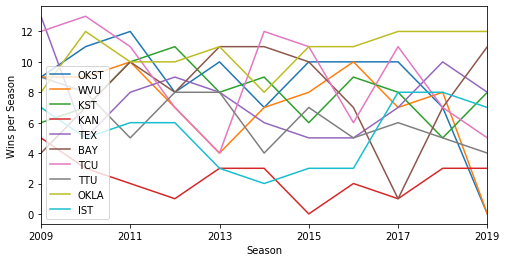

In [93]:
#fig, ax = plt.plot()

#df.plot(x="A", y=["B1", "C1", "D1", "E1"], ax=ax)
#df2.plot(x="A", y=["B2", "C2", "D2", "E2"], ax=ax2, ls="--")
recOKSTFB.Wins.plot()
recWVUFB.Wins.plot()
recKSTFB.Wins.plot()
recKANFB.Wins.plot()
recTEXFB.Wins.plot()
recBAYFB.Wins.plot()
recTCUFB.Wins.plot()
recTTUFB.Wins.plot()
recOKLAFB.Wins.plot()
recISTFB.Wins.plot()

plt.ylabel('Wins per Season')
plt.legend(['OKST','WVU','KST','KAN','TEX','BAY','TCU','TTU','OKLA','IST'])

In [96]:
recOKSTFB.loc['2019', 'Wins'] = 8
recOKSTFB.loc['2019', 'Losses'] = 5
recOKSTFB.tail()

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°,Wins,Losses
2015,2015,Gundy,10–3,7–2,,L Sugar,19,20,10,3
2016,2016,Gundy,10–3,7–2,,W Alamo,11,11,10,3
2017,2017,Gundy,10–3,6-3,3rd,W Camping World,14,14,10,3
2018,2018,Gundy,7–6,3-6,T-7th,W Liberty,,,7,6
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,5


In [97]:
recWVUFB.loc['2019', 'Wins'] = 5
recWVUFB.loc['2019', 'Losses'] = 7
recWVUFB.tail()

,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°,Wins,Losses
2015,2015,Holgorsen,8–5,4-5,5th,W Cactus,,,8,5
2016,2016,Holgorsen,10–3,7-2,T-2nd,L Russell,17,18,10,3
2017,2017,Holgorsen,7–6,5-4,T-4th,L Heart of Dallas,,,7,6
2018,2018,Holgorsen,8–4,6-3,T-3rd,L Camping World,22,20,8,4
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,7


In [106]:
test = pd.concat([recOKSTFB.Wins, recWVUFB.Wins, recTTUFB.Wins, recKSTFB.Wins, recKANFB.Wins, recTEXFB.Wins,
                 recBAYFB.Wins, recTCUFB.Wins, recOKLAFB.Wins, recISTFB.Wins], axis=1)
test.columns = ['OKST', 'WVU', 'TTU', 'KST', 'KAN', 'TEX', 'BAY', 'TCU', 'OKLA', 'IST']
test.tail()

,OKST,WVU,TTU,KST,KAN,TEX,BAY,TCU,OKLA,IST
2015,10,8,7,6,0,5,10,11,11,3
2016,10,10,5,9,2,5,7,6,11,3
2017,10,7,6,8,1,7,1,11,12,8
2018,7,8,5,5,3,10,7,7,12,8
2019,8,5,4,8,3,8,11,5,12,7


In [116]:
test.mean().sort_values()

KAN      2.363636
IST      5.272727
TTU      6.272727
WVU      7.636364
TEX      7.636364
KST      7.909091
BAY      7.909091
TCU      9.000000
OKST     9.272727
OKLA    10.636364
dtype: float64

In [111]:
test2 = test.OKLA
test2.value_counts()

12    4
11    3
10    2
8     2
Name: OKLA, dtype: int64

In [112]:
test.describe()

,OKST,WVU,TTU,KST,KAN,TEX,BAY,TCU,OKLA,IST
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
mean,9.272727,7.636364,6.272727,7.909091,2.363636,7.636364,7.909091,9.000000,10.636364,5.272727
std,1.618080,1.911687,1.793929,1.814086,1.361817,2.460599,3.207945,3.224903,1.501514,2.195036
min,7.000000,4.000000,4.000000,5.000000,0.000000,5.000000,1.000000,4.000000,8.000000,2.000000
25%,8.000000,7.000000,5.000000,6.500000,1.500000,5.500000,7.000000,6.500000,10.000000,3.000000
50%,10.000000,8.000000,6.000000,8.000000,3.000000,8.000000,8.000000,11.000000,11.000000,6.000000
75%,10.000000,9.000000,8.000000,9.000000,3.000000,8.500000,10.500000,11.500000,12.000000,7.000000
max,12.000000,10.000000,9.000000,11.000000,5.000000,13.000000,11.000000,13.000000,12.000000,8.000000


In [121]:
test.to_csv('BigTwelveTeamWins.csv')